In [1]:
import numpy as np
import tensorflow as tf

C:\Users\wjssm\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## tf.constant

In [4]:
hello = tf.constant('hello')
hello

<tf.Tensor 'Const_2:0' shape=() dtype=string>

In [5]:
sess = tf.Session()

In [7]:
a = sess.run(hello)
a

b'hello'

In [8]:
b = tf.constant(3)
c = tf.constant(4)

In [9]:
c+b

<tf.Tensor 'add:0' shape=() dtype=int32>

In [10]:
sess.run(c+b)

7

In [12]:
a = tf.fill((4,4),10)
sess.run(a)

array([[10, 10, 10, 10],
       [10, 10, 10, 10],
       [10, 10, 10, 10],
       [10, 10, 10, 10]])

In [13]:
b = tf.zeros((4,4))
sess.run(b)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [14]:
c = tf.random_normal((4,4), mean = 0, stddev=1)
sess.run(c)

array([[ 1.3954159 , -1.0511898 , -0.19053684,  0.51114446],
       [ 1.6479917 ,  0.1716073 ,  0.18074301, -0.32518375],
       [ 0.03302892,  0.1325287 , -0.14587548,  1.9979451 ],
       [-1.7333734 ,  0.6071973 , -0.24216165,  0.8275823 ]],
      dtype=float32)

In [16]:
my_ops = [a,b,c]

for op in my_ops :
    print(sess.run(op))

[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 1.6635963  -0.3898969   1.9815108   0.93610805]
 [ 1.1793562  -0.52958757  0.05326975 -0.49646717]
 [-0.25397566 -2.11841    -2.2004209   0.5120154 ]
 [-0.8643088  -0.36885232  0.5109923  -2.2714698 ]]


In [18]:
a = tf.constant([[1,2],
                 [3,4]])
b = tf.constant([[10],
                [100]])

In [21]:
result = tf.matmul(a,b)
sess.run(result)

array([[210],
       [430]])

## tf.Variable : W 
- Variable : tuned during training, initialized first

In [2]:
sess = tf.Session()

In [12]:
my_temp = tf.random_uniform((4,4),0,1) #initialize

In [13]:
my_var = tf.Variable(initial_value=my_temp)

In [14]:
#sess.run(my_var) -> error (initialization is required)
init = tf.global_variables_initializer()
sess.run(init)

In [15]:
sess.run(my_var)

array([[0.2027508 , 0.5513978 , 0.11365843, 0.45751715],
       [0.03151321, 0.3909533 , 0.0390085 , 0.24170887],
       [0.40586436, 0.31942105, 0.7745025 , 0.1898427 ],
       [0.22416222, 0.9391606 , 0.24474621, 0.44810045]], dtype=float32)

## tf.Placeholder : input(X)
- Place holder : empty --> feed during training (delcare)

In [39]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = a+b

In [41]:
sess.run(c, feed_dict={a :10, b:20}) #placeholder feed_dict first

30.0

## logistic regression

In [5]:
import sklearn.datasets as datasets

In [6]:
N = 300
X,y = datasets.make_moons(N, noise = 0.3)

In [20]:
import matplotlib.pyplot as plt

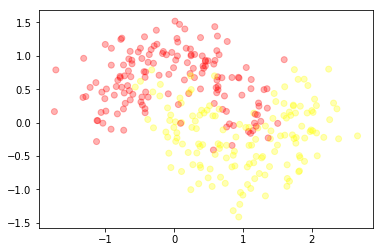

In [21]:
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.3, cmap = 'autumn')

In [22]:
X.shape

(300, 2)

In [23]:
y.shape

(300,)

In [24]:
y = y.reshape(N,1)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, train_size = 0.8)

C:\Users\wjssm\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
X_train.shape

(240, 2)

In [34]:
num_hidden = 3
#자료의 크기에 따라 달라지니까 mini-batch
x = tf.placeholder(tf.float32, shape = [None,2]) #x
t = tf.placeholder(tf.float32, shape = [None,1]) #y

In [35]:
W1 = tf.Variable(initial_value=tf.random_normal((2,num_hidden), mean = 0, stddev = 1.0))
b1 = tf.Variable(tf.zeros(num_hidden))
z1 = tf.matmul(x, W1) + b1
a1 = tf.nn.relu(z1)

In [36]:
W2 = tf.Variable(initial_value = tf.random_normal((num_hidden,1), mean = 0, stddev = 1.0))
b2 = tf.Variable(tf.zeros(1,1))
z2 = tf.matmul(a1, W2) + b2
a2 = tf.nn.sigmoid(z2)

In [37]:
#log-likelihood
cross_entropy = - tf.reduce_sum(t*tf.log(a2) + (1-t)*tf.log(1-a2))

In [38]:
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)

In [39]:
train_step = my_optimizer.minimize(cross_entropy)

#### preparation for result

In [42]:
correct_prediction = tf.equal(tf.to_float(tf.greater(a2,0.5)) , t) #tf.equal 같으면 True, 다르면 False
my_prediction = tf.cast(tf.greater(a2, 0.5),tf.float32)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [43]:
batch_size = 20
n_batches = N // batch_size
n_batches

15

In [44]:
#variable initialize
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [45]:
import sklearn.utils

In [46]:
for epoch in range(1000) :
    X_ , Y_  = sklearn.utils.shuffle(X_train, Y_train)
    
    for i in range(n_batches) :
        start = i*batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict = {x : X_[start:end, : ], t: Y_[start:end, :]})

In [47]:
accuracy.eval(session =sess, feed_dict = {
        x: X_test, t:Y_test    
})

0.8

In [48]:
accuracy.eval(session =sess, feed_dict = {
        x: X_train, t:Y_train    
})

0.87083334

In [49]:
tt = my_prediction.eval(session = sess, feed_dict = {
    x:X_test, t:Y_test
})


In [50]:
tt.shape

(60, 1)

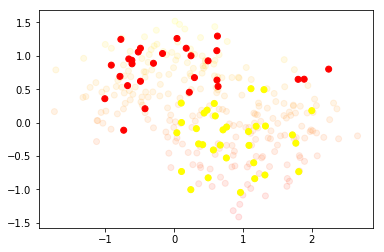

In [61]:
plt.scatter(x=X[:,0], y=X[:,1], alpha = 0.1, cmap = 'autumn',c = X[:,1])
plt.scatter(X_test[:,0], X_test[:,1], cmap = 'autumn', c = tt.reshape((60)))